# Importing Libraries

In [119]:
import torch
#from torch import nn
from torchvision import datasets, transforms

import numpy as np

#from sklearn import datasets

import matplotlib as mpl
#from matplotlib.colors import LinearSegmentedColormap
#from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
#reprlib_rules = reprlib.Repr()
#reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## Image Transforms

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

training_dataset = datasets.MNIST(root="../Datasets",
                                  train=True,
                                  download=True,
                                  transform=transform)

tabulation = Form_Generator()
font_colors_list = tabulation.color_selector()

tabulation.heading_printer("Loading and transformation of the MNIST dataset")

statements = [
    """
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

training_dataset = datasets.MNIST(root="../Datasets",
                                  train=True,
                                  download=True,
                                  transform=transform)
"""
]
tabulation.statement_generator(statements)

variables = ["transform", "training_dataset"]
values = [str(transform), str(training_dataset)]
tabulation.variable_generator(variables, values)

Loading and transformation of the MNIST dataset

    +--------------------------------------------------------+
    | Statement                                              |
    +--------------------------------------------------------+
    | transform = transforms.Compose(                        |
    |     [transforms.ToTensor(),                            |
    |      transforms.Normalize((0.5, ), (0.5, ))])          |
    |                                                        |
    | training_dataset = datasets.MNIST(root="../Datasets",  |
    |                                   train=True,          |
    |                                   download=True,       |
    |                                   transform=transform) |
    +--------------------------------------------------------+
    +------------------+----------------------------------------+
    | Variable         | Value                                  |
    +------------------+---------------------------------------

In [9]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,
                                              batch_size=100,
                                              shuffle=True)

tabulation = Form_Generator()
tabulation.heading_printer("Configuration of the training batches")

statements = [
    """
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,
                                              batch_size=100,
                                              shuffle=True)
"""
]
tabulation.long_statement_generator(statements)

expressions = [
    "len(training_loader)", "list(training_loader)[0][0].shape",
    "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape"
]
results = [
    str(len(training_loader)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Configuration of the training batches

    +-----------------------------------------------------------+
    | Statement                                                 |
    +-----------------------------------------------------------+
    | training_loader =                                         |
    |     torch.utils.data.DataLoader(dataset=training_dataset, |
    |     batch_size=100,                                       |
    |     shuffle=True)                                         |
    +-----------------------------------------------------------+
    +--------------------------------------+----------------------+
    | Expression                           | Result               |
    +--------------------------------------+----------------------+
    | len(training_loader)                 | 600                  |
    | list(training_loader)[0][0].shape    | torch.Size([100, 1,  |
    |                                      |             28, 28]) |
    | list(training_loade

In [10]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image


tabulation = Form_Generator()
tabulation.heading_printer("Function definition for plotting tensor images")

definitions = [
    """
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image
"""
]
tabulation.definition_generator(definitions)

Function definition for plotting tensor images

    +-------------------------------------------------+
    | Definition                                      |
    +-------------------------------------------------+
    | def im_convert(tensor):                         |
    |     image = tensor.clone().detach().numpy()     |
    |     image = image.transpose(1, 2, 0)            |
    |     image = image * np.array((0.5, 0.5, 0.5)) + |
    |     np.array((0.5, 0.5, 0.5))                   |
    |     image = image.clip(0, 1)                    |
    |     return image                                |
    +-------------------------------------------------+


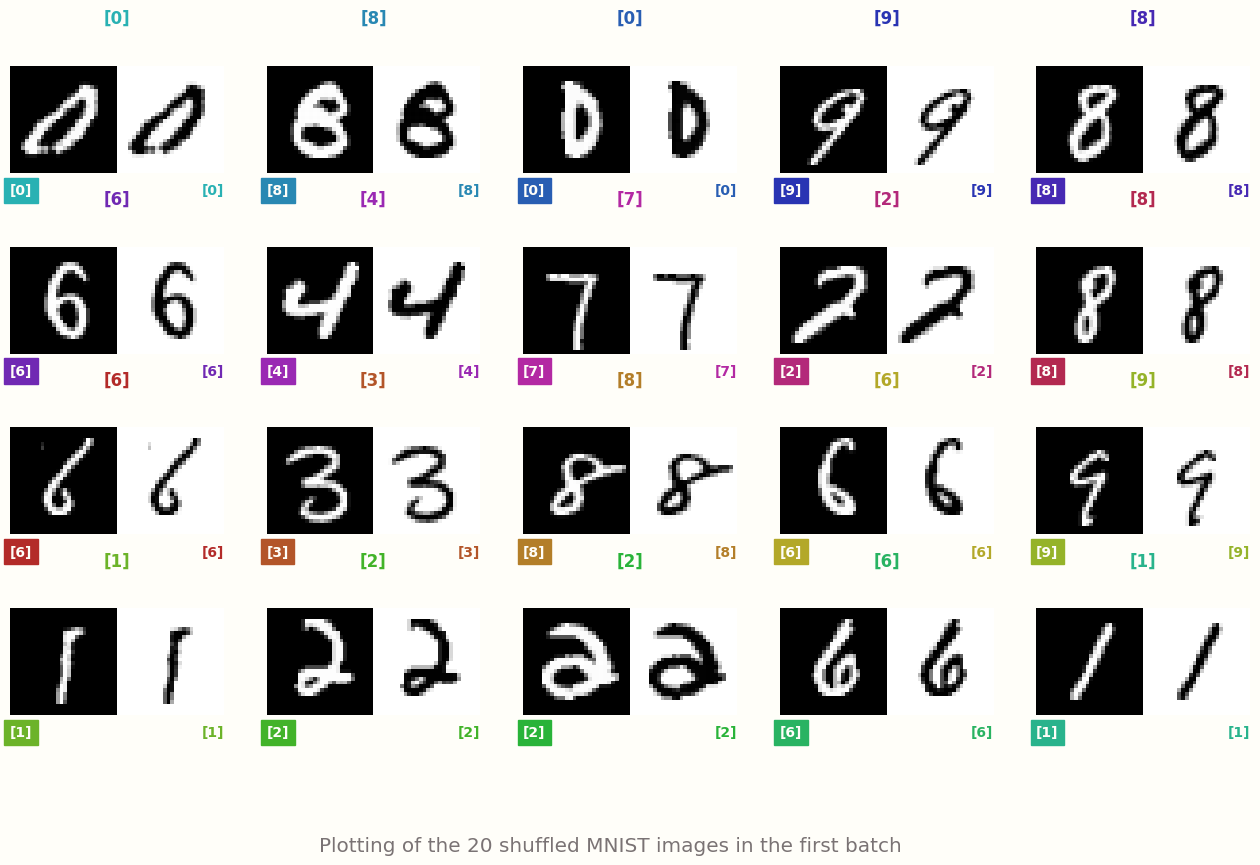

In [149]:
def image_to_scalar_data(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image.reshape(image.shape[0], -1)
    image = image * 0.5 + 0.5
    image = image.clip(0, 1)
    return image


colors = calm_color_generator(20)
fig = plt.figure(figsize=(figure_size[0], figure_size[1]))

dataiter = iter(training_loader)
images, labels = next(dataiter)

for idx in np.arange(20):
    ax = fig.add_subplot(4, 5, idx + 1, xticks=[], yticks=[], frameon=False)
    axins1 = inset_axes(ax,
                        width="50%",
                        height="100%",
                        loc=2,
                        borderpad=0)
    axins1.set(xticks=[], yticks=[], frame_on=False)
    plt.imshow(im_convert(images[idx]))
    axins1.set_xlabel([labels[idx].item()],
                      loc="left",
                      backgroundcolor=colors[idx],
                      color=plt.rcParams["axes.facecolor"],
                      fontweight="bold")

    axins2 = inset_axes(ax,
                        width="50%",
                        height="100%",
                        loc=1,
                        borderpad=0)
    axins2.set(xticks=[], yticks=[], frame_on=False)
    plt.imshow(image_to_scalar_data(images[idx]), cmap="binary")
    axins2.set_xlabel([labels[idx].item()],
                      loc="right",
                      color=colors[idx],
                      fontweight="bold")
    ax.set_title([labels[idx].item()],
                 loc="center",
                 pad=15,
                 color=colors[idx],
                 fontweight="heavy")

fig.suptitle("Plotting of the 20 shuffled MNIST images in the first batch",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.show()